In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re


C:\Users\mateo\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mateo\miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\mateo\miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_stata("C:/Users/mateo/Documents/data/pennwordtable/data/pwt1001.dta")
df.set_index(['year', 'country'], inplace=True)

# df.info()
df.head(3)

,,countrycode,currency_unit,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
year,country,,,,,,,,,,,,,,,,,,,,,
1950,Aruba,ABW,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951,Aruba,ABW,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,Aruba,ABW,Aruban Guilder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def get_index(df, name_var, production, work, base_year, index_bool = True, countries=None, method = 1,
             plot_bool=False, notes= None):
    if work == 'emp':
        df[name_var] = df[production]/df[work]
    elif work == 'avh':
        df[name_var] = df[production]/(df[work]* df['emp'])
    
    if index_bool:
        name_index = name_var + '_index'
        base_year= base_year
        
        # calculate the base productivity for each country
        if method == 1:
            base_prod = df.loc[(base_year, slice(None)), name_var].groupby('country').first()
            df[name_index] = df.groupby('country')[name_var].apply(lambda x: (x / base_prod[x.index.get_level_values('country')[0]]) * 100)
        else:        
            base_prod = pd.DataFrame(df.loc[(base_year, slice(None)), name_var].groupby('country').first()).reset_index()
            base_prod.columns = ['country', 'productivity_base']
            df = pd.merge(df.reset_index(), base_prod, how = 'left', left_on='country', right_on='country')
            df[name_index] = df[name_var] / df['productivity_base'] * 100
            df.drop('productivity_base', axis =  1, inplace = True)
        
        
    if plot_bool:
        sel_countries = countries if countries is not None else df.index.get_level_values('country').unique().to_list()
        if method == 1:
            pivot = df[df.index.get_level_values('country').isin(sel_countries) ][[name_index]].pivot_table(index='year', columns='country', values=name_index)
        else:
            # print(df[df['country'].isin(sel_countries) ])
            pivot = df[df['country'].isin(sel_countries) ].pivot_table(index='year', columns='country', values=name_index)

        # create a line plot of the index values for each country
        pivot.plot(kind='line')
        # add a title and axis labels
        title =f'Productivity Index ({production}/{work}). {base_year}=100'
        plt.title(title)
        plt.xlabel('Year')
        plt.ylabel('Index')
        plt.text(0.1, -0.20, notes,
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
        
        # add a grid
        plt.gca().grid(True)
        
        title = re.sub('\/|\.','', title)
        plt.savefig(title+'.png', dpi=300, bbox_inches='tight')
        # display the plot
        plt.show()
    
    return None


In [4]:
# filtro = df[name_var].index.get_level_values('country')#[2]
# print(filtro)
# base_prod[filtro]
df.index.get_level_values('country').unique().tolist()#[:10]

['Aruba',
 'Angola',
 'Anguilla',
 'Albania',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia (Plurinational State of)',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'D.R. of the Congo',
 'Congo',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Curaçao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Egypt',
 'Spain',
 'Estonia',
 'Ethiopia',
 'Finland',
 'Fiji',
 'France',
 'Gabon',
 'United Kingdom',
 'Georgia',
 'Ghana',
 'Guinea',
 'Gambia',
 'Guinea-Bissau',
 'Equatorial Guinea',
 'Greece',
 'Grenada',
 

In [5]:
# df.index.get_level_values('country').unique().to_list()

# base_prod = df.loc[(base_year, slice(None)), name_var].groupby('country').first()

# # df.groupby('country')[name_var].apply(lambda x: (x / base_prod[base_prod.index.get_level_values('country')[0]]) * 100)
# pd.DataFrame(base_prod).reset_index()#[base_prod.index.get_level_values('country')[0]]

## Productivity
Variables
* rgdpna: Real GDP at constant 2017 national prices (in million 2017 USD).
* rgdpo Output-side real GDP at chained PPPs (in million 2017 USD).

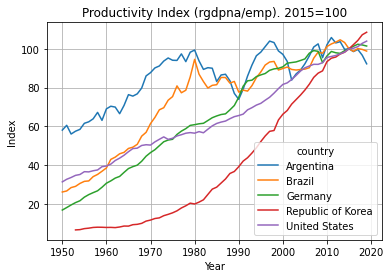

In [6]:
sel_countries = ['Argentina', 'United States', 'Germany', 'Brazil', 'Republic of Korea']
# sel_countries = ['Argentina', 'United States', 'China', 'Germany', 'Brazil', 'Republic of Korea']
base_year = 2015
name_var  = 'productivity_emp' 
production = 'rgdpna'
# production = 'rgdpo'
work = 'emp'
notes = None 
# notes = 'rgdpna is Real GDP at constant 2017 national prices (in million 2017 USD)' if  production == 'rgdpna' else 'rgdpo is Output-side real GDP at chained PPPs (in million 2017 USD).'
get_index(df,  name_var = name_var, production= production, work =work, base_year= base_year,
           countries=sel_countries, method = 2,
         plot_bool=True,  notes = notes)

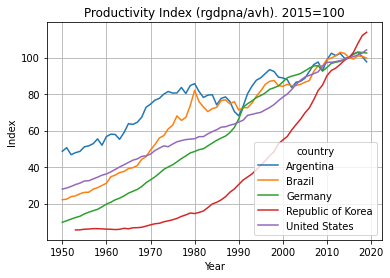

In [7]:

get_index(df, 'productivity_h', production, 'avh', base_year=base_year, plot_bool=True, countries=sel_countries, method = 1, notes = None)

# Rate of profit